In [3]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "./Data/mouse_drug_data.csv"
clinical_trial = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial)

# Combine the data into a single dataset
combined_df= pd.merge(mouse_drug_df, clinical_trial_df, how="left", on=["Mouse ID", "Mouse ID"])
drop_combined_df= combined_df.drop(columns= "Metastatic Sites")
# Display the data table for preview
drop_combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3)
0,f234,Stelasyn,0,45.000000
1,f234,Stelasyn,5,47.313491
2,f234,Stelasyn,10,47.904324
3,f234,Stelasyn,15,48.735197
4,f234,Stelasyn,20,51.112713


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_df=drop_combined_df.groupby(["Drug", "Timepoint"])
mean_df= mean_tumor_df.mean()

# print(mean_df)
mean_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [27]:
sta_error_df = mean_tumor_df.sem()
sta_error_df= combined_df.drop(columns= "Metastatic Sites")
sta_error_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3)
0,f234,Stelasyn,0,45.000000
1,f234,Stelasyn,5,47.313491
2,f234,Stelasyn,10,47.904324
3,f234,Stelasyn,15,48.735197
4,f234,Stelasyn,20,51.112713


In [91]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [30]:

reformat_df=st_error_df.reset_index()
reformat_df=reformat_df.pivot(index= "Timepoint", columns= "Drug")["Tumor Volume (mm3)"]
reformat_df

KeyError: 'Timepoint'

<IPython.core.display.Javascript object>


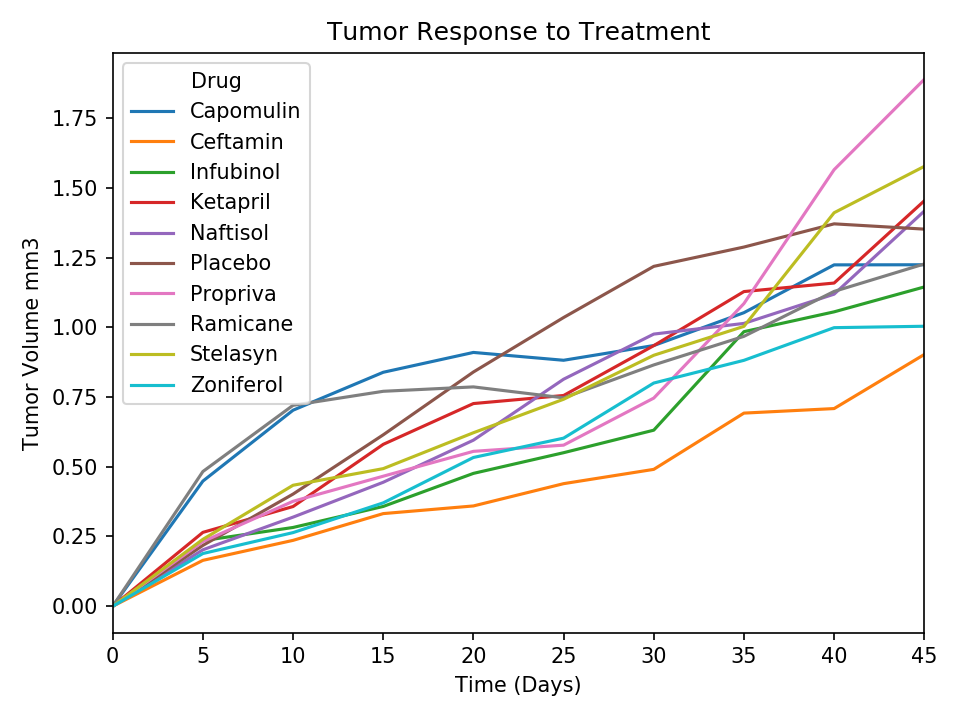

In [18]:
# Generate the Plot (with Error Bars)
reformat_plot= plt.errorbarsreformat_df.plot(kind='line')
reformat_plot.set_title("Tumor Response to Treatment")
reformat_plot.set_xlabel("Time (Days)")
reformat_plot.set_ylabel("Tumor Volume mm3")

# Save the Figure
plt.show()
plt.tight_layout()

In [19]:
# Show the Figure


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [19]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_df=combined_df.groupby(["Drug", "Timepoint"])
mean_met_df=met_df.mean()
meanmet_df= mean_met_df.drop(columns= "Tumor Volume (mm3)")


# Convert to DataFrame

# Preview DataFrame
meanmet_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [20]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mn_tumor_df=mean_met_df.sem()
mn_tumor_df= combined_df.drop(columns= "Tumor Volume (mm3)")


mn_tumor_df.head()


# Convert to DataFrame

# Preview DataFrame


,Mouse ID,Drug,Timepoint,Metastatic Sites
0,f234,Stelasyn,0,0
1,f234,Stelasyn,5,0
2,f234,Stelasyn,10,0
3,f234,Stelasyn,15,1
4,f234,Stelasyn,20,2


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [25]:
# Minor Data Munging to Re-Format the Data Frames
ref_df=mn_tumor_df.reset_index()
ref_df=ref_df.pivot(index= "Timepoint", columns= "Drug")["Metastatic Sites"]
ref_df
# Preview that Reformatting worked


ValueError: Index contains duplicate entries, cannot reshape

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [31]:
# Generate the Plot (with Error Bars)
ref_plot= plt.errorbarsref_df.plot(kind='line')
ref_plot.set_title("Survival During Treatment")
ref_plot.set_xlabel("Time (Days)")
ref_plot.set_ylabel("Survival Rate")

# Save the Figure
plt.show()
plt.tight_layout()
# Save the Figure

# Show the Figure


AttributeError: module 'matplotlib.pyplot' has no attribute 'errorbarsref_df'

\![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)